In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from joblib import dump
from xgboost import XGBRegressor
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

C:\Users\Muril\AppData\Local\Temp\ipykernel_17896\2986201397.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Comecou!!
Terminou!!
['black' 'draw' 'white']
0.04617921935129192
Acabou!!
[('turns', 60.146516393442596), ('victory_status', 2.1649590163934427), ('winner', 1.091188524590164), ('white_rating', 1554.8954918032794), ('d4', 0.3073770491803278), ('d5', 0.21618852459016383), ('c4', 0.10348360655737707), ('c6', 0.06659836065573772), ('cxd5', 0.011270491803278687), ('e6', 0.10758196721311485), ('dxe6', 0.0010245901639344258), ('fxe6', 0.0010245901639344245), ('Nf3', 0.34938524590163944), ('Bb4+', 0.0), ('Nc3', 0.22336065573770486), ('Ba5', 0.0), ('Bf4', 0.03381147540983604), ('Nc6', 0.2704918032786885), ('e4', 0.3668032786885245), ('e5', 0.30430327868852464), ('d6', 0.09631147540983608), ('b5', 0.06250000000000001), ('a4', 0.05737704918032784), ('c3', 0.0584016393442623), ('a3', 0.05122950819672129), ('Kg6', 0.0051229508196721256), ('Kh6', 0.0010245901639344245), ('Nf6', 0.2889344262295081), ('Kg5', 0.0020491803278688513), ('Be2', 0.018442622950819675), ('O-O', 0.27356557377049173), ('Ke7',

<Figure size 1000x800 with 0 Axes>

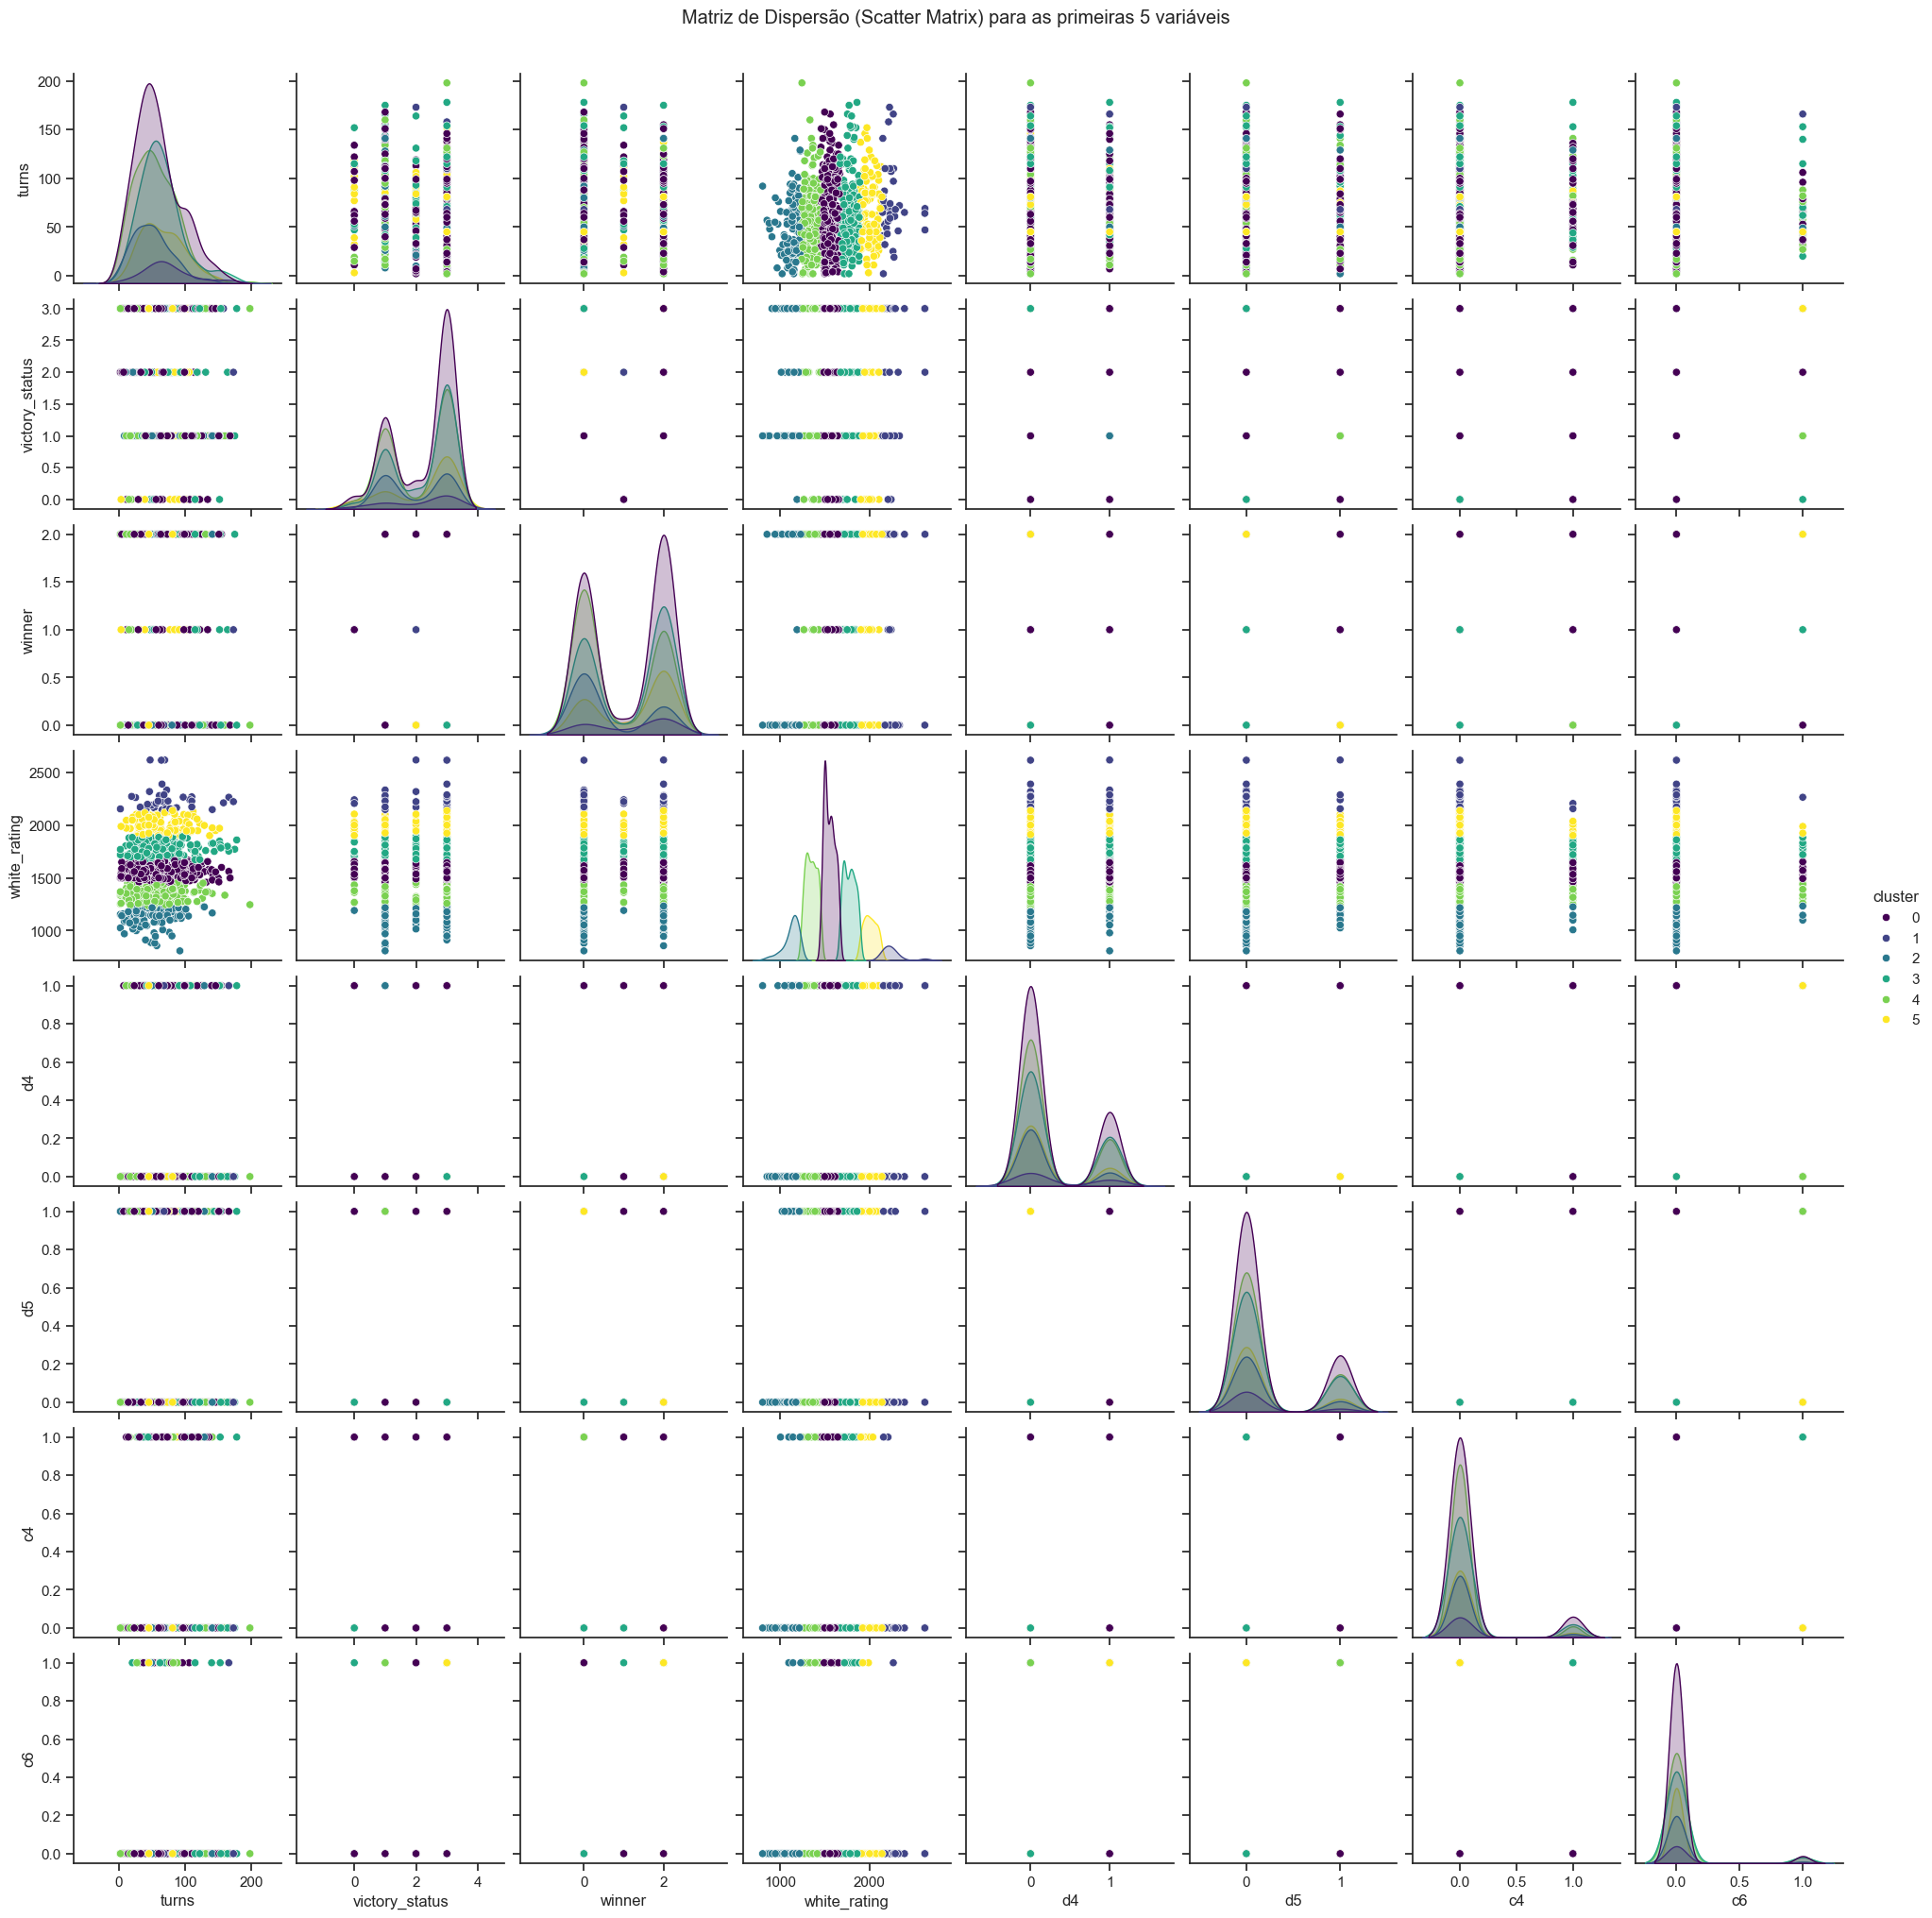

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from joblib import dump
from sklearn.cluster import MiniBatchKMeans
import seaborn as sns
from warnings import simplefilter


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

df = pd.read_csv('DataSet\\games.csv')

df.columns = df.columns.str.strip()
df.dropna()
df.drop(
    ['id', 'created_at', 'white_id', 'black_id', 'increment_code', 'opening_eco', "last_move_at", "rated", "opening_name", "black_rating", "opening_ply"],
    axis = 1,
    inplace = True
)

le = LabelEncoder()

print("Comecou!!")

df['moves'] = df["moves"].str.split()
moves = df['moves']
i = 0

for sublist in moves:
    moves = sublist[0: 10: 2]
    for item in sublist:
        if item in df.loc[i, 'moves']:
            df.loc[i, item] = 1
    i += 2
    if i > 20056:
        print("Terminou!!")
        break
df = df.fillna((int)(0))

df.drop(
    [ 'moves'],
    axis = 1,
    inplace = True
)

df['victory_status'] = le.fit_transform(df['victory_status'])
df['winner'] = le.fit_transform(df['winner'])
print(le.classes_)

Y = df['winner']
X = df

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

model = MiniBatchKMeans(n_clusters=6,
                        random_state=42,
                        batch_size=20,
                        max_iter=500,
                        n_init="auto")
model.fit(X_train, X_test)
dump(model, 'chess.pkl')

preds = model.predict(X)
df['cluster'] = preds

data = list(zip(preds, Y, df['d4'].values.tolist()))

win = 0
draw = 0
lost = 0

for i in data:
    if i[2] == 1:
        if i[0] == 0:
            if i[1] == 2:
                win += 1
            elif i[1] == 1:
                draw += 1
            else:
                lost += 1

    

total = win + draw + lost
porcent = draw / total
        
print(porcent)
print("Acabou!!")


print(list(zip(df.columns, model.cluster_centers_[0])))
print(list(zip(df.columns, model.cluster_centers_[1])))
print(list(zip(df.columns, model.cluster_centers_[2])))
print(list(zip(df.columns, model.cluster_centers_[3])))
print(list(zip(df.columns, model.cluster_centers_[4])))
print(list(zip(df.columns, model.cluster_centers_[5])))

plt.figure(figsize=(10, 8))
sns.set_theme(style="ticks")
sns.pairplot(df.sample(1000), vars=df.columns[0:8], hue='cluster', palette='viridis')
plt.suptitle('Matriz de Dispersão (Scatter Matrix) para as primeiras 5 variáveis', y=1.02)
plt.show()




In [ ]:
print(df.columns)
print(list(model.cluster_centers_[0]))
print(list(model.cluster_centers_[1]))
print(list(model.cluster_centers_[2]))
print(list(model.cluster_centers_[3]))
print(list(model.cluster_centers_[4]))
print(list(model.cluster_centers_[5]))